In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
try:
    df_iris= pd.read_csv('iris.data', sep=',', encoding='utf-8', names=(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'classe']) ) 
except FileNotFoundError as fnf:
    print("Fichier non trouvé: {} ".format(fnf))
except pd.errors.EmptyDataError as ede:
    print("Aucune données: {}".format(ede))
except pd.errors.ParserError as pe:
    print("Erreur au parsing: {}".format(pe))
except Exception as e:
    print("Un exception a eu lieu au chargement du fichier: {}".format(e) )

1 - Créez un dépôt contenant un script python utilisant pandas, qui ouvre le dataset. Et
affiche quelques statistiques de base sur ce dernier (head, describe,
groupby(“column”).count).

In [3]:
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df_iris.groupby('classe').count()

,sepal_length,sepal_width,petal_length,petal_width
classe,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


2 - (À faire après le deuxième cours) - Supposons que deux personnes travaillent sur ce
dépôt. En tant qu'étudiant, vous jouerez les deux rôles. Créez deux branches distinctes
(feature1 et feature2), chacune ajoutant une fonctionnalité différente au script principal :

Fonctionnalité 1 : ajouter une fonction qui retourne un dataframe filtré de la base de
données selon une condition spécifique.

In [6]:
df_iris_filtered_by_length = df_iris.query('sepal_length > 5.0 & classe == "Iris-setosa" ')

In [7]:
df_iris_filtered_by_length

,sepal_length,sepal_width,petal_length,petal_width,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa


Fonctionnalité 2 : Faire un graphique sur la base de données.
Travaillez sur chaque branche séparément, en ajoutant les fonctionnalités
correspondantes. Faites un commit et poussez vos modifications sur GitHub. Que
vous fusionnerez par la suite, résolvez les éventuels conflits avant de valider la
fusion.

In [8]:
df_iris_group = df_iris.groupby('classe')['sepal_length', 'sepal_width', 'petal_length', 'petal_width'].mean()

C:\TEMP\ipykernel_5848\3205342444.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_iris_group = df_iris.groupby('classe')['sepal_length', 'sepal_width', 'petal_length', 'petal_width'].mean()


In [9]:
df_iris_degroup = df_iris_group.reset_index()

In [10]:
df_iris_degroup

,classe,sepal_length,sepal_width,petal_length,petal_width
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


NameError: name 'plt' is not defined

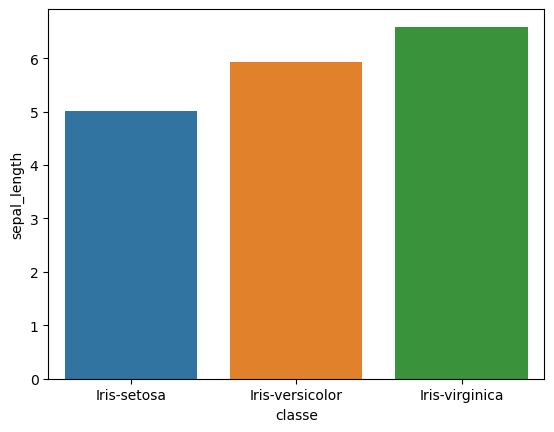

In [11]:
fig = sns.barplot(data=df_iris_degroup, x='classe', y='sepal_length', ci='sd')
plt.ylabel("moyenne de la taille des sépales", size = 14)
plt.xlabel("Type de fleurs", size = 14)